## Introduction

In this notebook, I will be using the CNN (Convolutional Neural Network) Model using the Fashion MNIST dataset to classify each image into ten classes. 

#### Dataset
Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60_000 examples and a test set of 10,000 examples. Each example is a 28 x 28 grayscale image, associated with a label from 10 classes.

Each image is 28 pixels in height and 28 pixels in width, for a toal of 784 pixels.

#### Labels
Each training and test example is assigned to one of the following labels:
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

### Load Packages and Install Dependencies

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip3 install -U scikit-learn scipy matplotlib

In [ ]:
!pip install pydot
!pip install ann_visualizer
!brew install graphviz

In [31]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 858.4 kB/s eta 0:00:00a 0:00:01


In [ ]:
conda install tensorflow
conda install -c anaconda keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from ann_visualizer.visualize import ann_viz
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

2023-08-25 18:55:51.703348: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [5]:
from IPython.display import Image, display

#### Import the data

In [6]:
fashion_train_df = pd.read_csv('dataset/fashion-mnist/fashion-mnist_train.csv', sep = ',')

In [7]:
fashion_test_df = pd.read_csv('dataset/fashion-mnist/fashion-mnist_test.csv', sep = ',')

#### Data Exploration

In [8]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [12]:
fashion_train_df.shape

(60000, 785)

In [13]:
fashion_test_df.shape

(10000, 785)

In [14]:
training = np.array(fashion_train_df, dtype = 'float32')

In [15]:
test = np.array(fashion_test_df, dtype= 'float32')

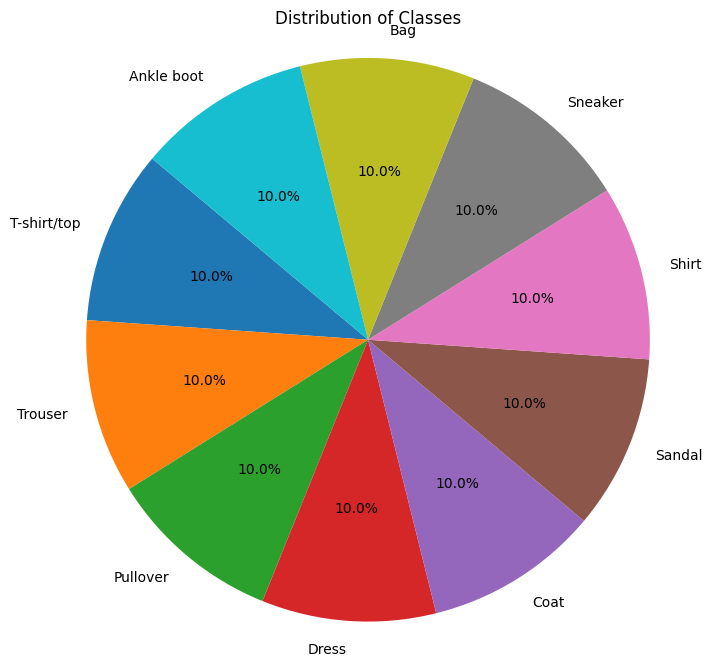

In [16]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

class_counts = [np.sum(training[:, 0] == i) for i in range(10)]

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Classes")
plt.show()

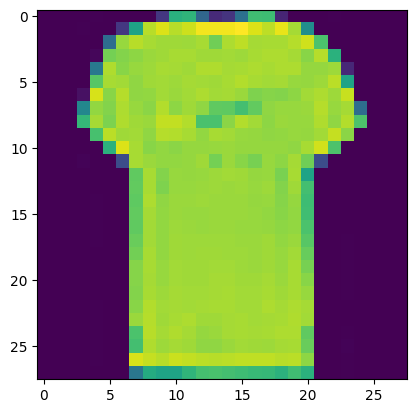

In [59]:
# visualize the image in our dataset
# using the plt library, use the training dataset
# let's look at image 10, located at row 10
# since the image has been flatten to 785 columns, we'll include their columns with [1:]
# we'll skip the first column 'label' as we don't want to include that in our image
# and we'll reshape to the original pixel size, which would be 28 x 28

plt.imshow(training[10, 1:].reshape(28, 28))

0.0

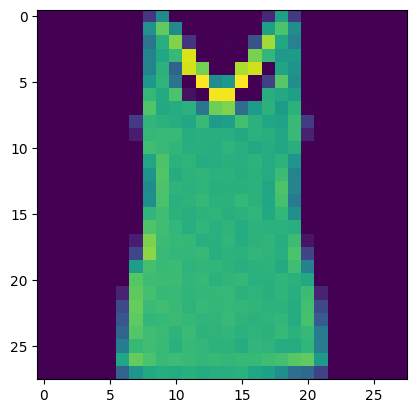

In [60]:
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

In [ ]:
# let's look at our classifier labels:

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

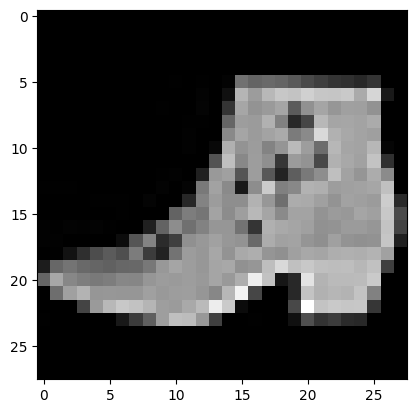

In [10]:
# let's view some images
i = random.randint(1, 60_000) # select any random index from 1 to 60,000
plt.imshow(training[i, 1:].reshape((28, 28))) # reshape and plot the image

plt.imshow(training[i, 1:].reshape((28, 28)), cmap='gray') # reshape and plot the image

##### view image in grid format

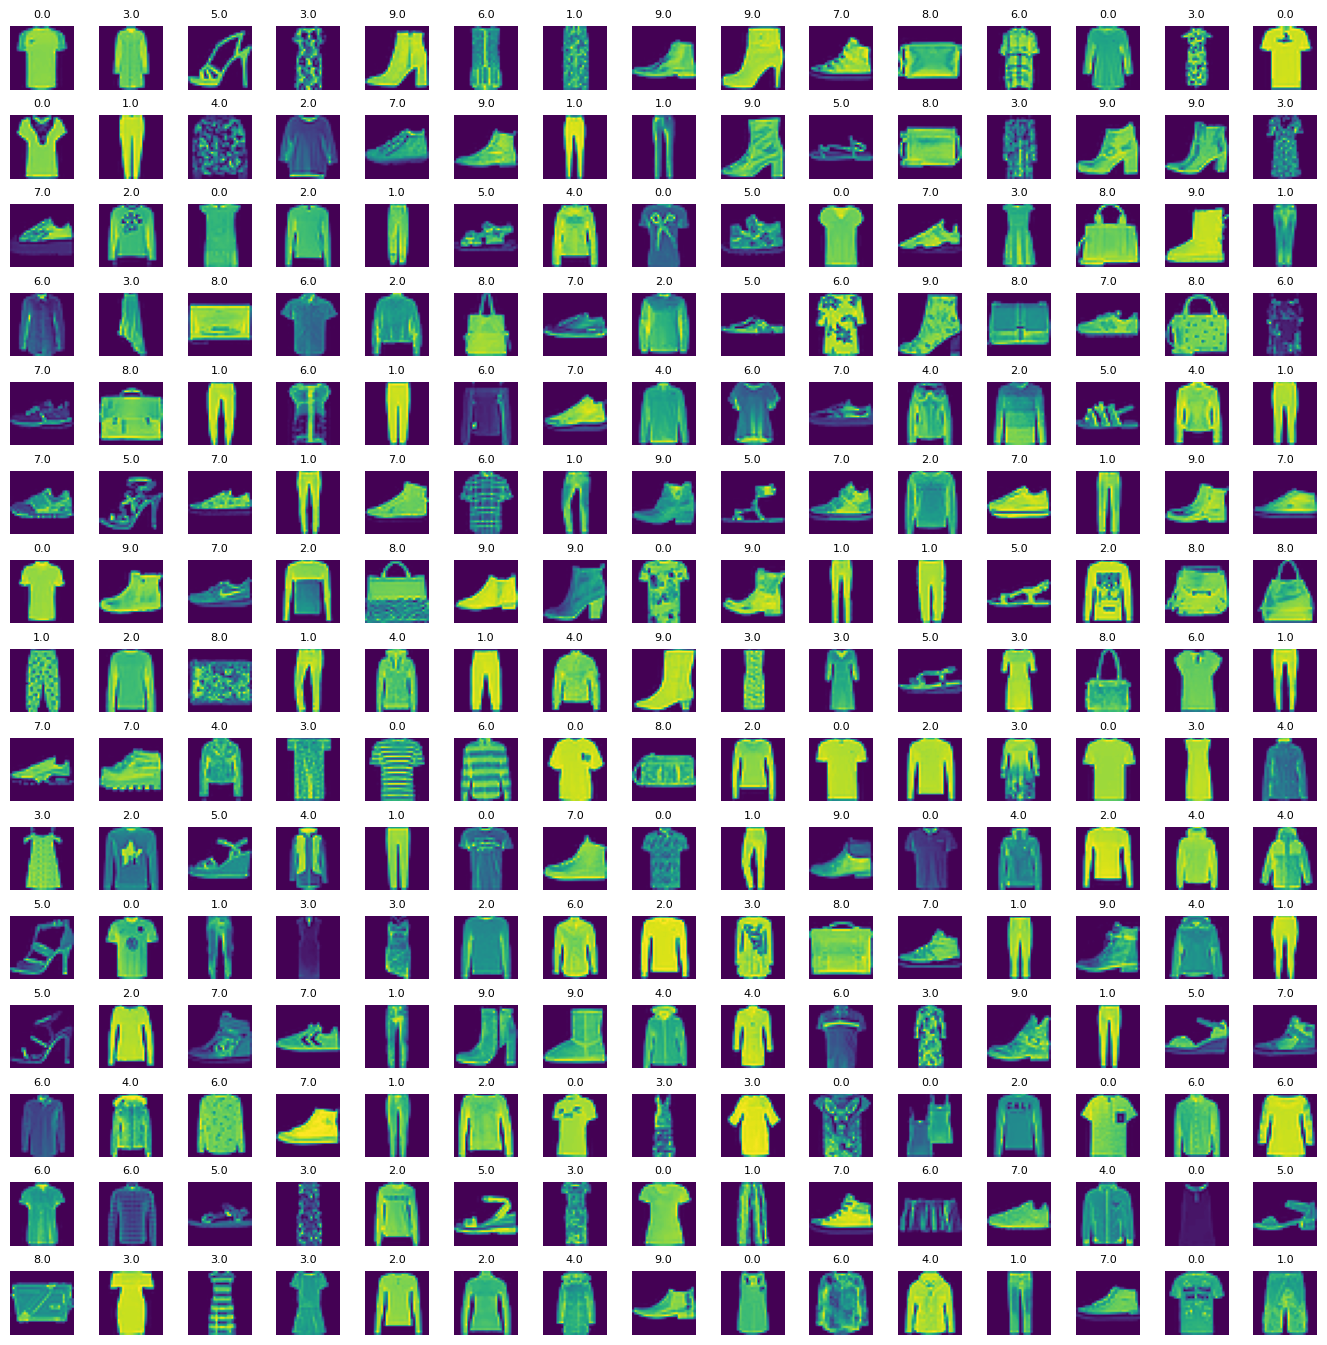

In [11]:
# let's view more images in a grid format
# define the dimensions of the plot grid

W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))

axes = axes.ravel() # flatten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables
    # select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4) # height between images

#### Model Training

In [15]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [16]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [17]:
X_test = test[:, 1:]/255
y_test = test[:, 0]

In [18]:
# use train test split to split x_validate with size of 20% of the dataset
# random_state for reproducible result

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [19]:
# * unpack the tuple
# reshape our data to feed into neural network
# we need our data in this case to be in the form of 28 x 28 by one

X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [20]:
X_train.shape

(48000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
X_validate.shape

(12000, 28, 28, 1)

In [25]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, 3, 3, padding='same', input_shape = (28, 28, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Dropout(0.20))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 32, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [26]:
# we'll use categorical cross entropy as it's multi-class classification

cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 10, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                51232     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

#### Model Architecture

This cnn_model will build a 3 layer Neural Network for the multi-class image classification task:

CONV2D(RELU) -> MAXPOOL -> DROPOUT(0.20) -> FLATTEN -> DENSE(RELU) -> DENSE(SOFTMAX)

I tried multiple different architectures with slightly different regularization techniques, let's take a look at some of their results, and why I chose the architecture above:

* First Architecture:
CONV2D(RELU)(VALID PADDING) -> MAXPOOL -> DROPOUT(0.25) -> FLATTEN -> DENSE(RELU) -> DENSE(SIGMOID)

The first architecture produced the following result:

<b>Train:</b>

Loss: 0.35

Accuracy: 0.87

<b>Validation:</b>

Loss: 0.34

Accuracy: 0.87

<b>Test:</b>

Loss: 0.33

Accuracy: 0.88

One of the class (class 6 - Shirt) seems to produce low F1 score:
Class 6 (Shirt) : 0.66

Looking at the confusion matrix, I can see that class 6 (Shirt) is often misclassified as class 0 (T-shirt/Top). It may be because of similar features between Shirt and T-shirt.

Without a human-level or Bayes error to compare to, it's difficult to benchmark the result. I wanted to try a few different models and see if I can improve the accuracy of the model before going with the one that I had and tried a few other models, including multiple Convolutional layers or adding more Dense layers.

Which resulted in a few different scenarios, take a look:

* the architecture with 2 Convolutional layers and 3 dense layers resulted in the model overfitting to the training dataset and the performance on the validation set begins to degrade half-way
<figure>
    <center> <img src="./model-result/train-vs-val.png"   style="width:500px;height:280px;" ></center>
</figure>

* After removing one Convolutional layer or one dense layer, the validation loss consistently remained significantly lower than the training loss and the two curves never converge. I tried adding more epochs to see if the model may need more training time, but the train and validation loss suggests that it is having a hard time learning after adding the epochs.
There may be a few explanations for this situations, but since the first simple architecture was able to generalize pretty well on both training and validation, the data may not be the issue and more of a model complexity issue, take a look at the plots:

<figure>
    <center><img src="./model-result/train-vs-val-2.png"   style="width:500px;height:280px;" > <img src="./model-result/train-vs-val-3.png"   style="width:500px;height:280px;" ></center>
</figure>

* After a few more tuning on adding/removing dropout and changing its values, adding/removing number of layers, I went with the following architecture, and it's able to generalize better to the datasets:

CONV2D(RELU) -> MAXPOOL -> DROPOUT(0.20) -> FLATTEN -> DENSE(RELU) -> DENSE(SOFTMAX)

<figure>
    <center> <img src="./model-result/final-train-vs-val.png"   style="width:500px;height:280px;" ></center>
</figure>

In [32]:
ann_viz(cnn_model, view=True, filename="cnn_model_architecture", title="CNN - Model - Simple Architecture")

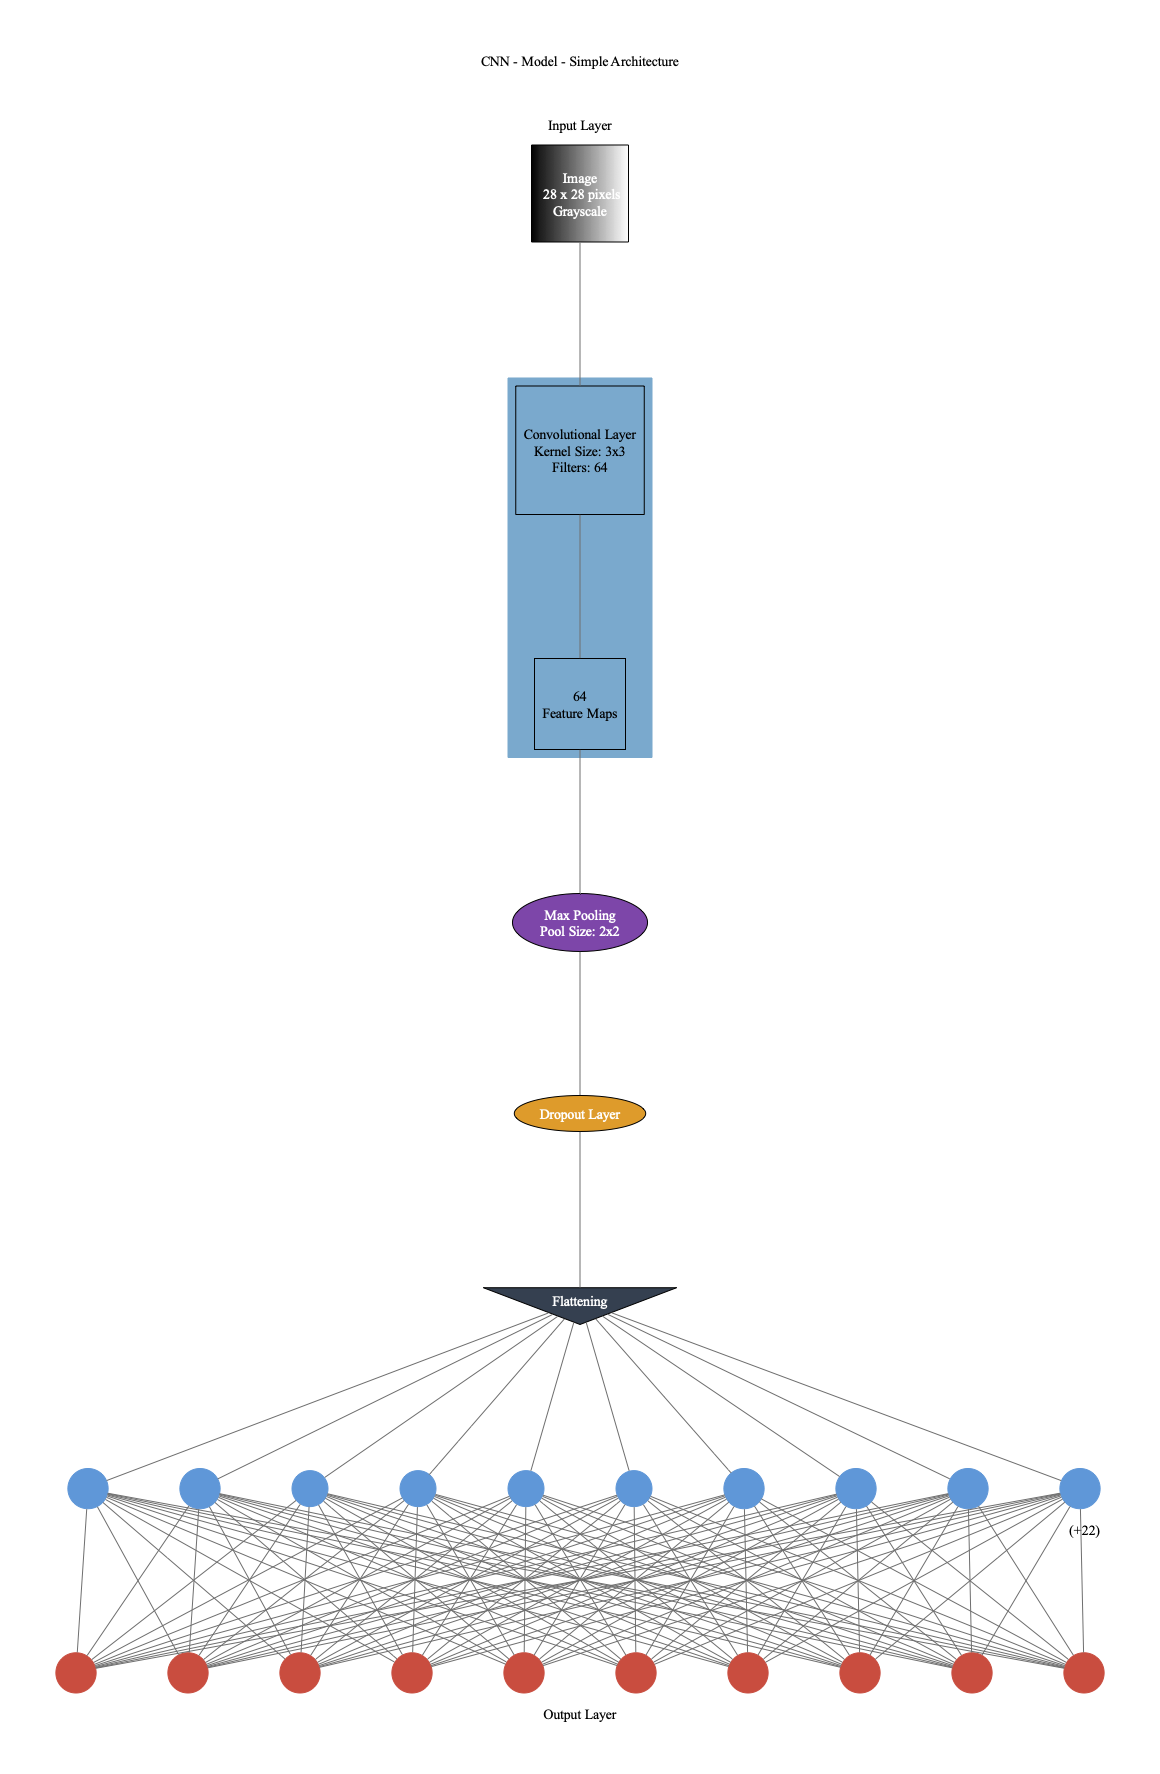

In [37]:
png_path = "cnn_model_architecture.png"

display(Image(filename=png_path))

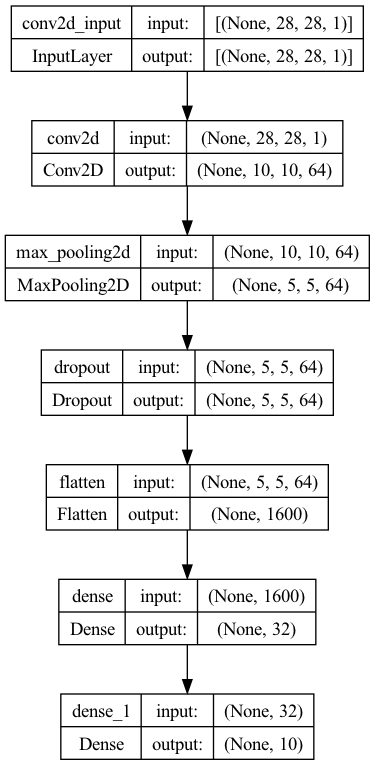

In [27]:
# Visualize the model and save it as a PNG file
plot_model(cnn_model, to_file='model.png', show_shapes=True)

In [44]:
epochs = 50

# apply the model to our data

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 1s 10ms/step - loss: 1.1050 - accuracy: 0.6362 - val_loss: 0.6506 - val_accuracy: 0.7662
Epoch 2/50
94/94 [==============================] - 1s 9ms/step - loss: 0.6082 - accuracy: 0.7787 - val_loss: 0.5378 - val_accuracy: 0.8107
Epoch 3/50
94/94 [==============================] - 1s 10ms/step - loss: 0.5298 - accuracy: 0.8106 - val_loss: 0.4890 - val_accuracy: 0.8293
Epoch 4/50
94/94 [==============================] - 1s 9ms/step - loss: 0.4856 - accuracy: 0.8273 - val_loss: 0.4512 - val_accuracy: 0.8429
Epoch 5/50
94/94 [==============================] - 1s 9ms/step - loss: 0.4582 - accuracy: 0.8353 - val_loss: 0.4266 - val_accuracy: 0.8474
Epoch 6/50
94/94 [==============================] - 1s 10ms/step - loss: 0.4393 - accuracy: 0.8435 - val_loss: 0.4163 - val_accuracy: 0.8503
Epoch 7/50
94/94 [==============================] - 1s 10ms/step - loss: 0.4279 - accuracy: 0.8467 - val_loss: 0.3989 - val_accuracy: 0.8564
Epoch 8/50
94/94

In [45]:
# Save model architecture to JSON
model_json = cnn_model.to_json()
with open("model_config.json", "w") as json_file:
    json_file.write(model_json)


In [46]:
cnn_model.save_weights('model_weights.h5')

In [47]:
# reproduce the same model and performance
from keras.models import model_from_json

with open('model_config.json', 'r') as json_file:
    loaded_model_config = json_file.read()

loaded_model = model_from_json(loaded_model_config)
loaded_model.load_weights('model_weights.h5')
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#### Model Evaluation

Text(0.5, 1.0, 'Train - Accuracy')

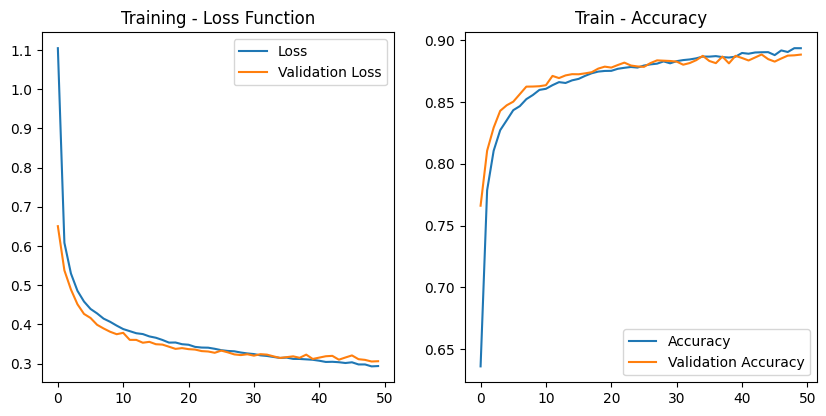

In [48]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')


In [49]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8933
Test Accuracy: 0.893


In [50]:
# get the predicted probabilities for the test data
predicted_probs = cnn_model.predict(X_test)

# find the class with the highest probability for each instance
predict_class = np.argmax(predicted_probs, axis=1)

313/313 [==============================] - 0s 884us/step


In [51]:
predict_class

array([0, 1, 2, ..., 8, 8, 1])

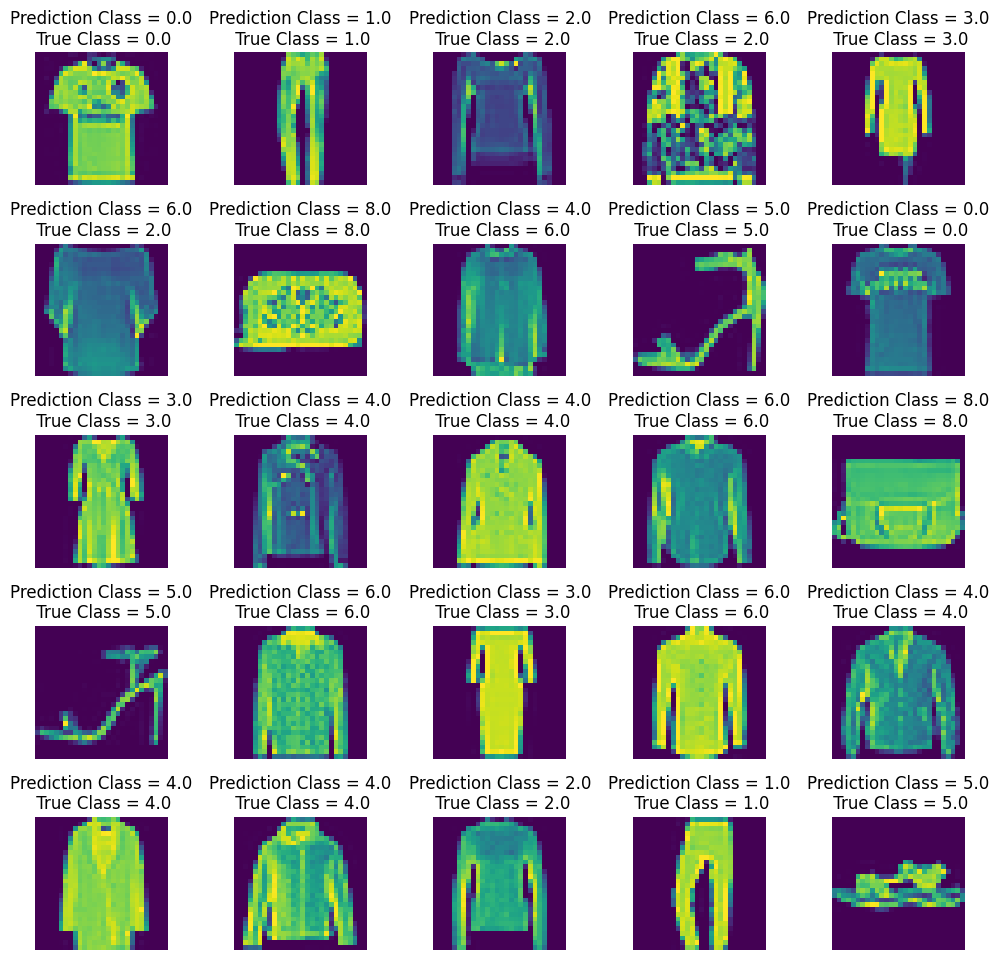

In [52]:
# Ley's take a look at how well our model is predicting the classes of each class
# vs the ground truth label by creating a 5 x 5 grid, showing 25 images

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel() 

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predict_class[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

The following matrix shows a matrix of how often we've correctly classified a class and misclassified. For example, the intersection of true label class 6 and predicted label class 0 indicates that there are 172 instances when our model predicted the image to be class 0, but the true value is class 6

For reference:
class 0 - T-shirt/Top
class 6 - Shirt

In [42]:
from sklearn.metrics import confusion_matrix

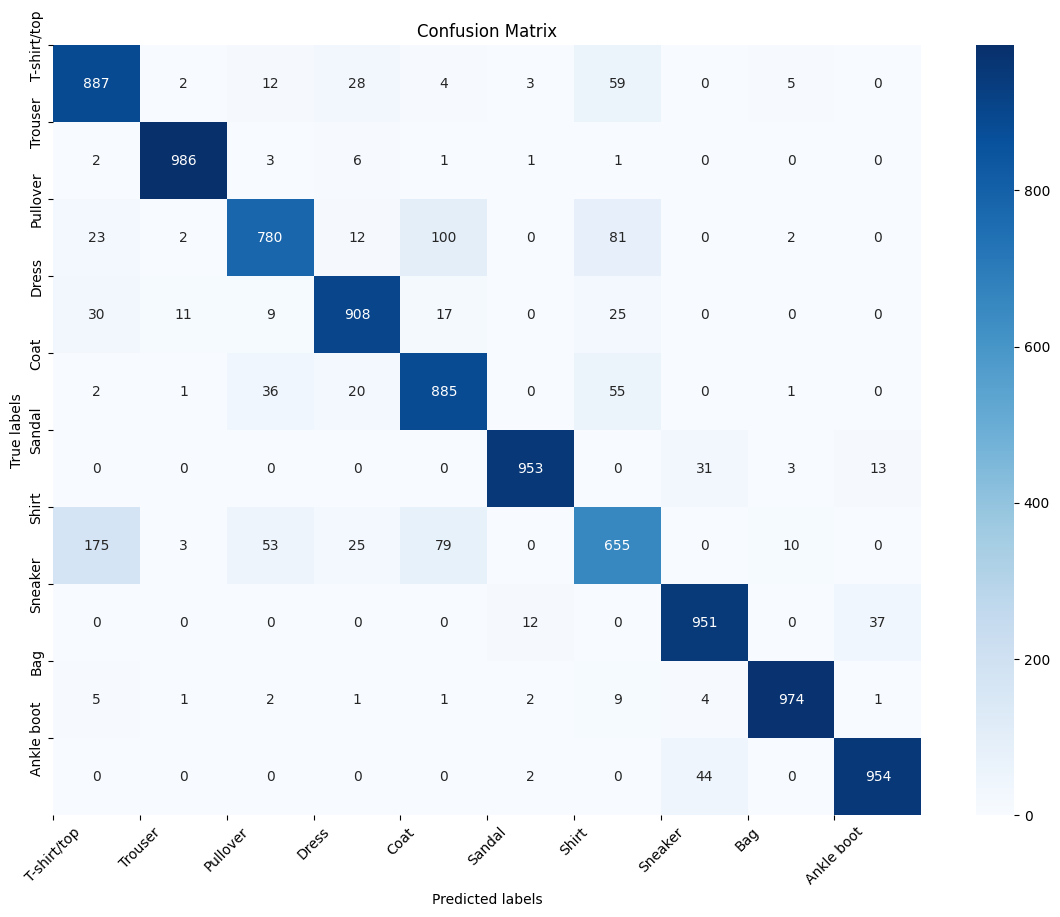

In [53]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict_class)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the class names as labels for the axes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to the axes
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()


In [54]:
from sklearn.metrics import classification_report

num_classes = 10
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

report = classification_report(y_test, predict_class, target_names=class_names)
print(report)


              precision    recall  f1-score   support

 T-shirt/top       0.79      0.89      0.84      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.87      0.78      0.82      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.81      0.89      0.85      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.74      0.66      0.69      1000
     Sneaker       0.92      0.95      0.94      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



#### Results

With the final architecture choice, the model was able to generalize better to the test sets with 89% accuracy. Though the accuracy can still be improved, a few things I may try to improve further results:

The model consistently performed poorly when trying to differentiate in the shirt category. All the classes in that category scored less than the overal accuracy score, which brings the overall score down:
* class 0 T-shirt/top:  0.84/0.89
* class 2 Pullover:     0.82/0.89
* class 4 Coat:         0.85/0.89
* class 6 Shirt:        0.69

Looking at the data, it may be because of the lack of context in the images. When looking at other images, the edges of the shape may make it easier to differentiate between, let's say, a shoe and a shirt, but between a shirt and T-shirt, without other context may be hard to differentiate, looking at the grid below for all T-shirts/Top vs Shirts, they look quite similar, with class 6 being a more dressier shirt in general than T-shirt/top, but there are also some class 0 images that are quite dressy, for example, some class 0 items do have collars and peplum decorations, which I may have classified as class 6 instead of class 0. (take a look at the 10x10 grid of both class 0 and class 6). Some suggestions to improve this issue:
* re-label data: depending on the overal objective of the project, going through the dataset and re-labelling a number of images may be worth the effort to further differentiate class 6 and class 0.
* collect more data: collecting more data may help the model learn the features in these classes better.
* data augmentation: with the current data, increase the data-set through data augmentation of these categories.
* changing the test/validation/test split, the current model is trained on a 70/15/15 split, with a total of 70_000 examples, splitting it by 80/10/10 may allow the model to learn features better and increase accuracy.
* Neural Network Architecture with different parameters: Try different model architectures and parameters to learn these features better, a more complex model may help with the right regularization.

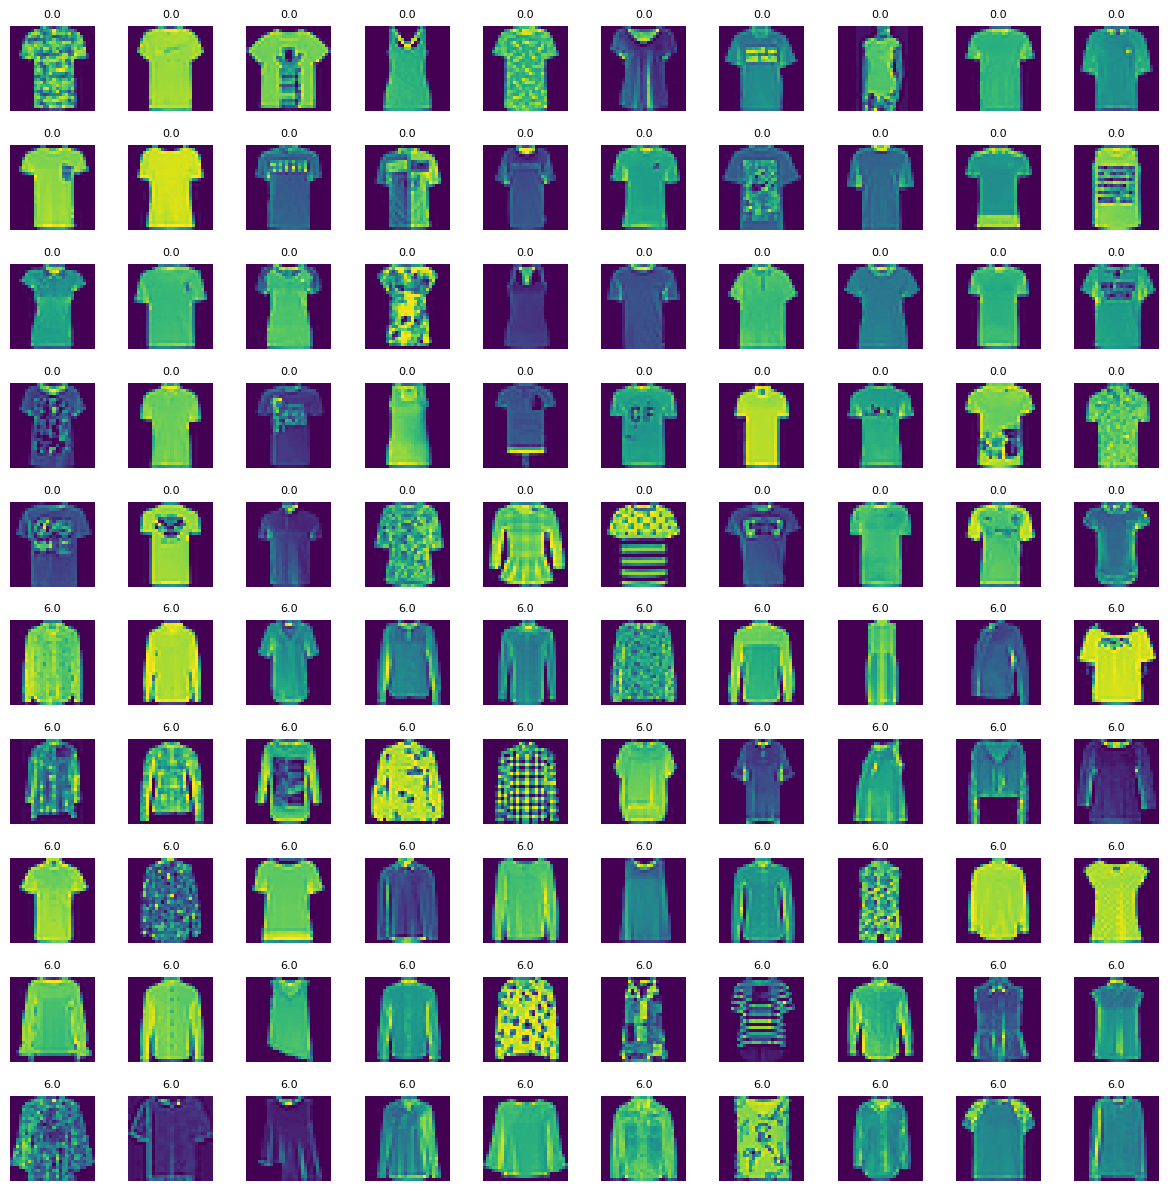

In [61]:
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(15, 15))
axes = axes.ravel()

n_training = len(training)

# Select class 6 and class 0 images
class_0_indices = np.where(training[:, 0] == 0)[0]
class_6_indices = np.where(training[:, 0] == 6)[0]
selected_indices = np.concatenate((class_0_indices[:W_grid * L_grid // 2], class_6_indices[:W_grid * L_grid // 2]))

for i, index in enumerate(selected_indices):
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
